In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train_data = pd.read_csv('titanic_train.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

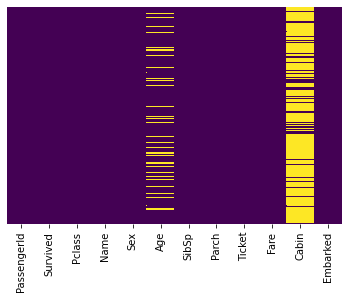

In [7]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

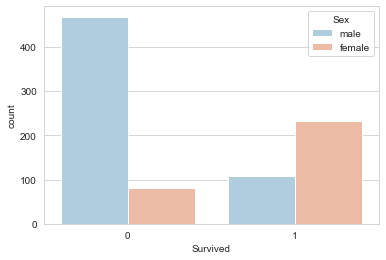

In [9]:
sns.countplot(x='Survived', data=train_data, hue='Sex', palette='RdBu_r')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

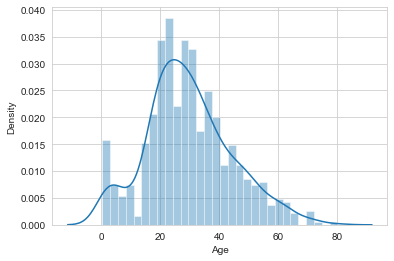

In [10]:
sns.distplot(train_data['Age'].dropna(), bins=30)

<AxesSubplot:ylabel='Frequency'>

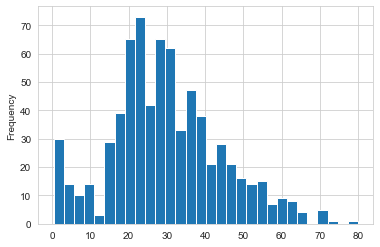

In [11]:
train_data['Age'].plot.hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

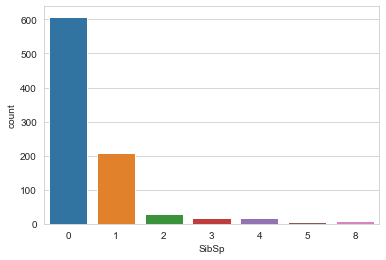

In [12]:
sns.countplot(x='SibSp', data=train_data)

<AxesSubplot:>

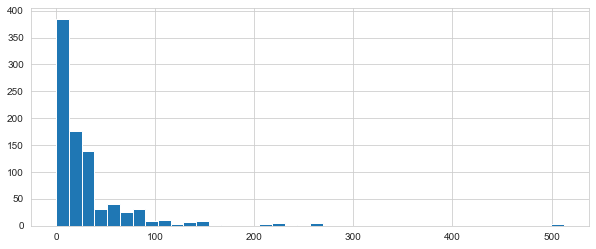

In [13]:
train_data['Fare'].hist(bins=40, figsize=(10,4))

In [14]:
import cufflinks as cf
cf.go_offline()

In [15]:
train_data['Fare'].iplot(kind='hist', bins=50)

<Figure size 720x504 with 0 Axes>

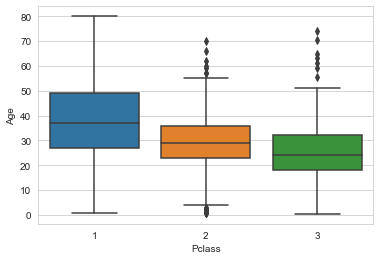

<Figure size 720x504 with 0 Axes>

In [17]:
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.figure(figsize=(10,7))

In [18]:
#Replace missing data with some substitute value according to passenger class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

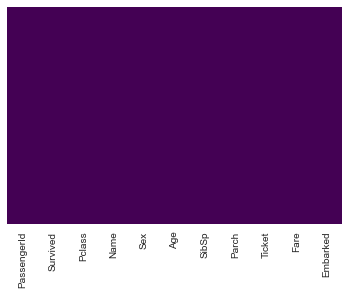

In [25]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
train_data.drop('Cabin', axis=1, inplace=True)

In [24]:
train_data.dropna(inplace=True)

In [29]:
Gender = pd.get_dummies(train_data['Sex'], drop_first=True)

In [30]:
Embark = pd.get_dummies(train_data['Embarked'], drop_first=True)

In [32]:
Embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [33]:
train_data = pd.concat([train_data, Gender, Embark], axis=1)

In [35]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [36]:
train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
train_data.drop(['PassengerId'], axis=1, inplace=True)

In [39]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [42]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logModel = LogisticRegression()

In [46]:
logModel.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [47]:
predictions = logModel.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)